In [136]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder

In [137]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [138]:
import warnings
warnings.simplefilter('ignore')

In [139]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [140]:
print(os.path.exists("/content/drive/MyDrive/SS/weatherAUS.csv"))

True


In [141]:
ds = pd.read_csv("/content/drive/MyDrive/SS/weatherAUS.csv")

In [142]:
ds.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

In [143]:
ds = ds.drop(["Date"], axis=1)
ds.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [144]:
ds.shape

(145460, 22)

In [145]:
# Ініціалізація списків для зберігання інформації
columns = []
missing_values = []
total_values = []
percentage_missing = []

# Збір інформації для кожної колонки
for column in ds.columns:
  if ds[column].isnull().sum() != 0:
    columns.append(column)
    missing = ds[column].isnull().sum()
    total = len(ds[column])
    percentage = (missing / total) * 100

    missing_values.append(missing)
    total_values.append(total)
    percentage_missing.append(percentage)

# Створення датафрейму з зібраною інформацією
summary_df = pd.DataFrame({
    'Column': columns,
    'Missing Values': missing_values,
    'Total Values': total_values,
    'Percentage Missing': percentage_missing
})

# Виведення таблиці
print(summary_df)

           Column  Missing Values  Total Values  Percentage Missing
0         MinTemp            1485        145460            1.020899
1         MaxTemp            1261        145460            0.866905
2        Rainfall            3261        145460            2.241853
3     Evaporation           62790        145460           43.166506
4        Sunshine           69835        145460           48.009762
5     WindGustDir           10326        145460            7.098859
6   WindGustSpeed           10263        145460            7.055548
7      WindDir9am           10566        145460            7.263853
8      WindDir3pm            4228        145460            2.906641
9    WindSpeed9am            1767        145460            1.214767
10   WindSpeed3pm            3062        145460            2.105046
11    Humidity9am            2654        145460            1.824557
12    Humidity3pm            4507        145460            3.098446
13    Pressure9am           15065        145460 

In [146]:
ds = ds.drop(["Evaporation", "Sunshine", "Cloud9am", "Cloud3pm"], axis=1)
ds.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [147]:
from tabulate import tabulate

def check_miss_data():
    data = []

    for x in ds.columns:
        if ds[x].isnull().sum() != 0:
            total_missing = ds[x].isnull().sum()
            total_values = len(ds[x])
            percent_missing = (total_missing / total_values) * 100
            data.append([x, total_missing, total_values, percent_missing])

    if data:
        print(tabulate(data, headers=["Column", "Missing Values", "Total Values", "Percentage Missing"], tablefmt="grid"))
    else:
        print("There is no NaN value")

check_miss_data()

+---------------+------------------+----------------+----------------------+
| Column        |   Missing Values |   Total Values |   Percentage Missing |
+===============+==================+================+======================+
| MinTemp       |             1485 |         145460 |             1.0209   |
+---------------+------------------+----------------+----------------------+
| MaxTemp       |             1261 |         145460 |             0.866905 |
+---------------+------------------+----------------+----------------------+
| Rainfall      |             3261 |         145460 |             2.24185  |
+---------------+------------------+----------------+----------------------+
| WindGustDir   |            10326 |         145460 |             7.09886  |
+---------------+------------------+----------------+----------------------+
| WindGustSpeed |            10263 |         145460 |             7.05555  |
+---------------+------------------+----------------+----------------------+

In [148]:
ds.dropna(subset=['RainTomorrow'], inplace=True)

def check_miss_data():
  missingArr = []

  for x in ds.columns:
      if ds[x].isnull().sum() != 0:
          print(x + '\t', ds[x].isnull().sum() + '\t', len(ds[x]), ds[x].isnull().sum() / len(ds[x]) * 100)
          missingArr.append(x)
  if (len(missingArr) == 0):
    print("there is no NaN value")

check_miss_data()

In [149]:
for column in ds.columns:
    if ds[column].dtype == 'object':
        ds[column].fillna('Missing', inplace=True)
    else:
        median_value = ds[column].median()
        ds[column].fillna(median_value, inplace=True)

In [150]:
##ds = ds.dropna(axis=0)
#ds.shape

In [151]:
check_miss_data()

There is no NaN value


In [152]:
ds.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


In [153]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le_col = ds.select_dtypes(include=['object']).columns

for x in le_col:
  ds[x] = le.fit_transform(ds[x])

ds.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.9,0.6,14,44.0,14,15,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,1,0
1,2,7.4,25.1,0.0,15,44.0,7,16,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,1,0
2,2,12.9,25.7,0.0,16,46.0,14,16,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,1,0
3,2,9.2,28.0,0.0,5,24.0,10,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,1,0
4,2,17.5,32.3,1.0,14,41.0,1,8,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,1,0


In [154]:
import seaborn as sns

# for Q-Q plots
import scipy.stats as stats

In [155]:
# function to create histogram, Q-Q plot and


def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

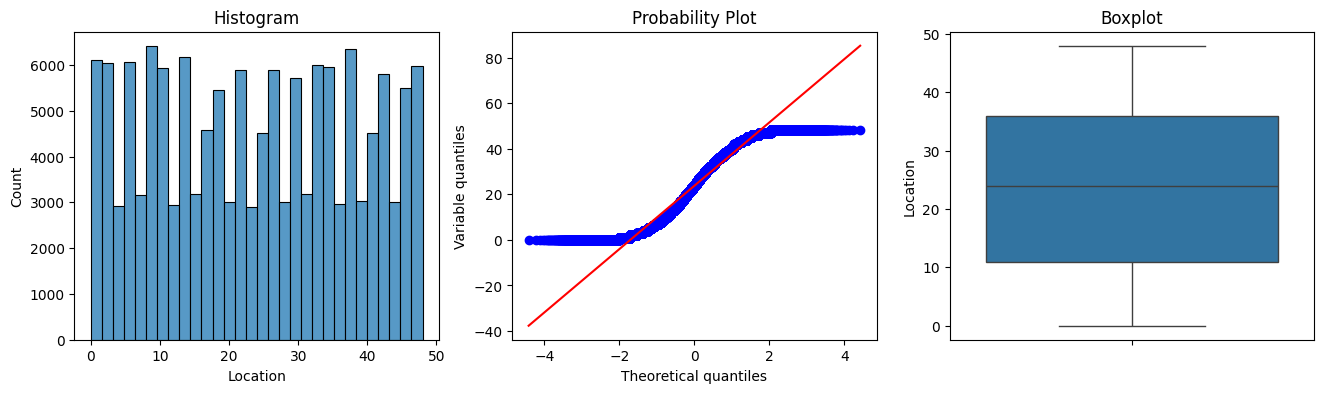

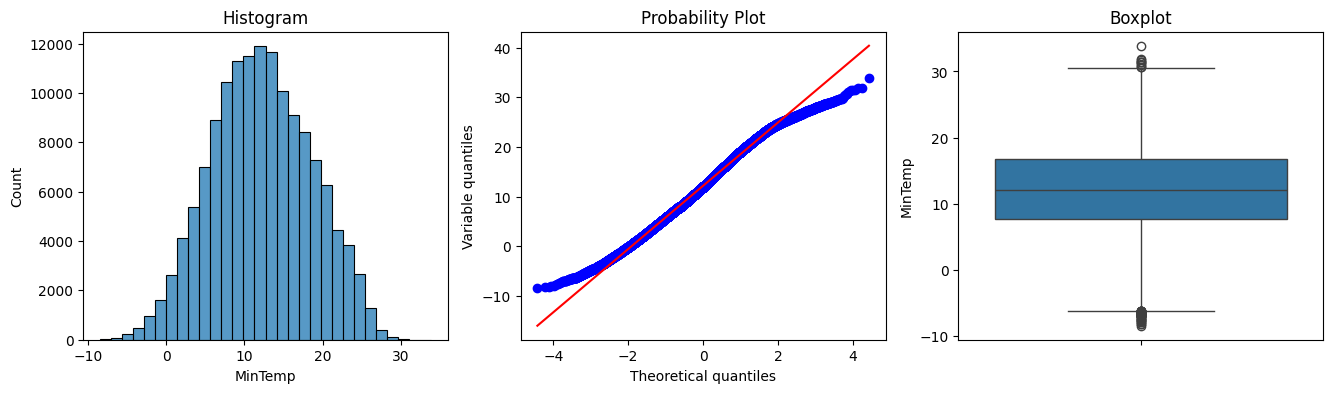

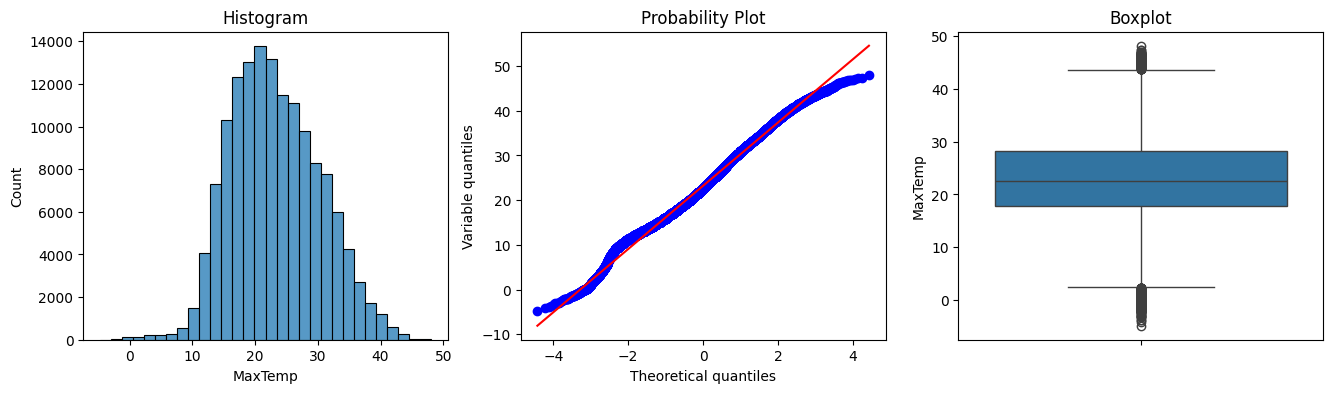

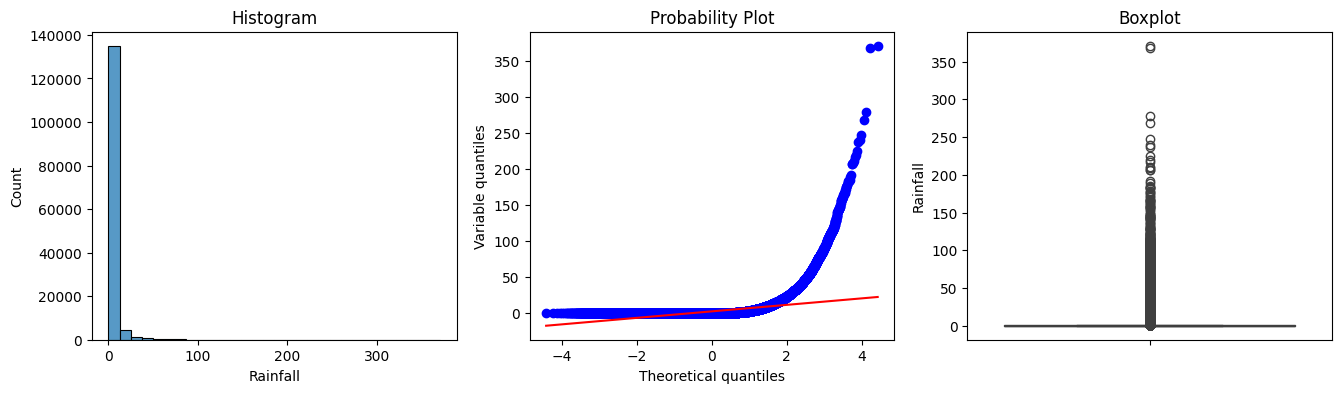

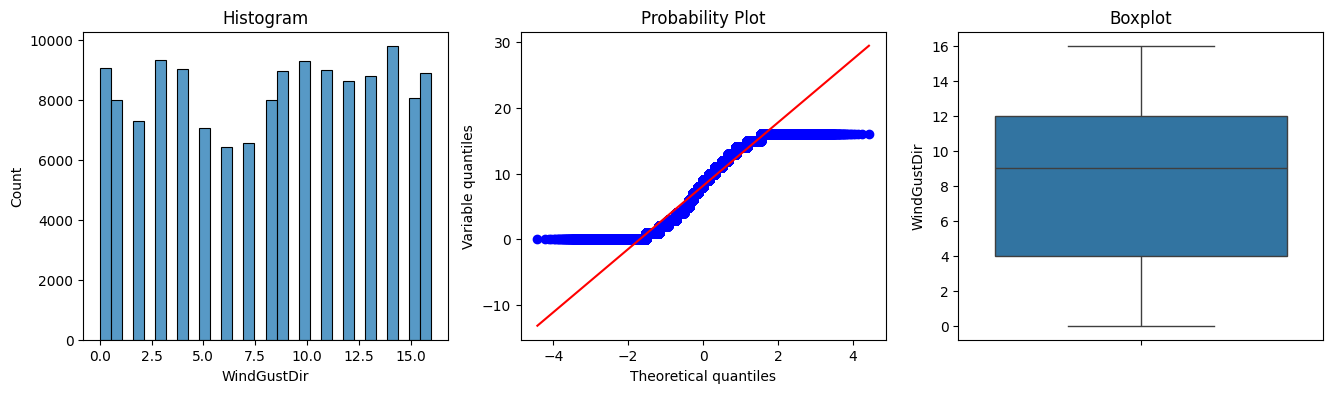

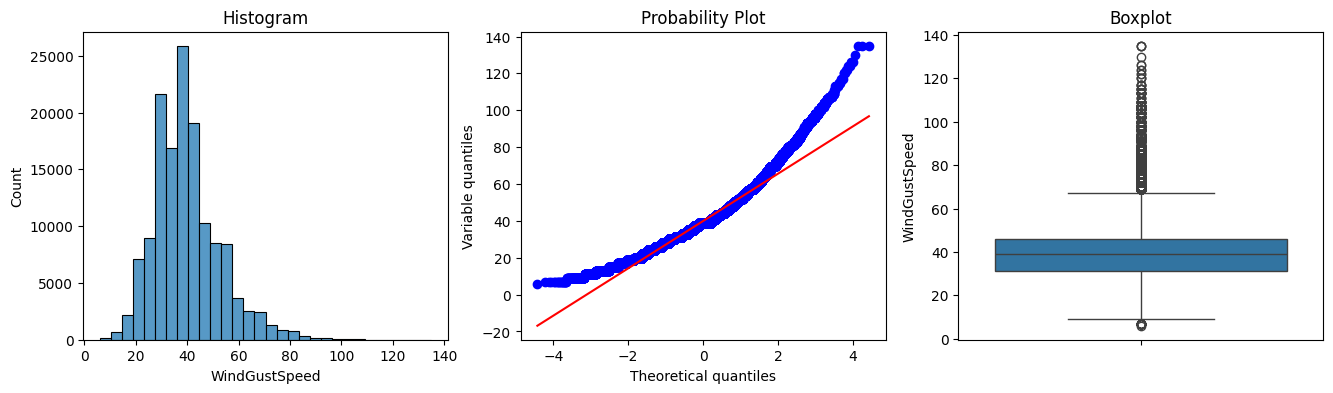

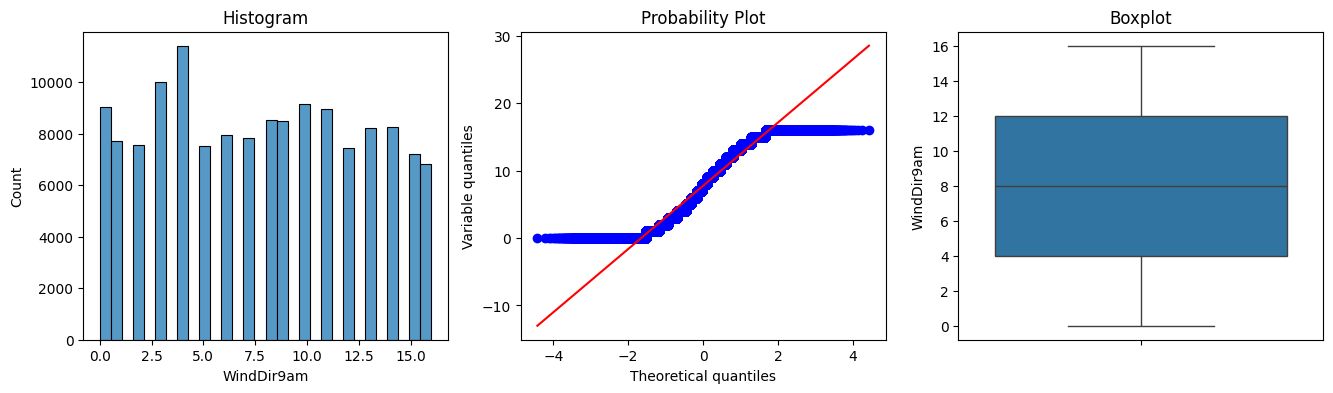

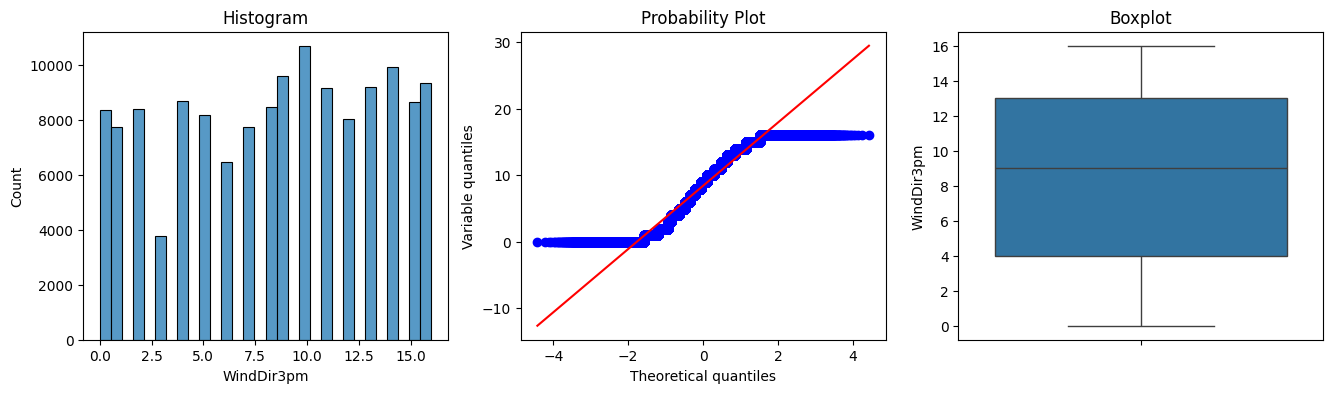

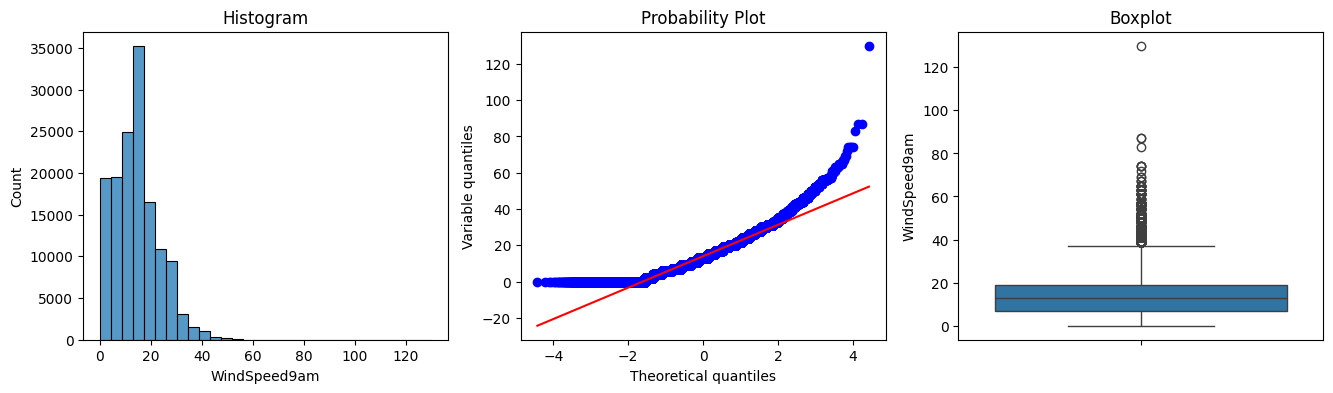

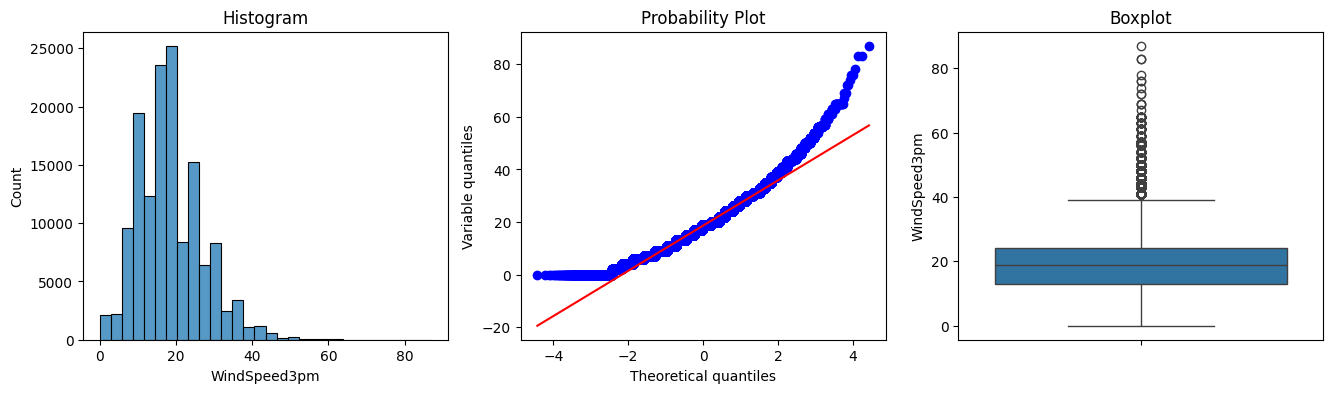

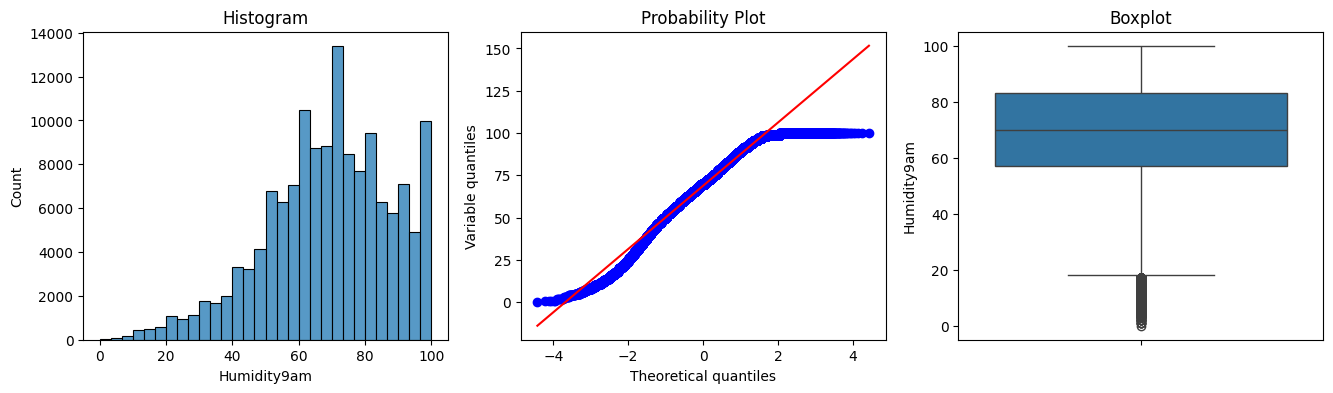

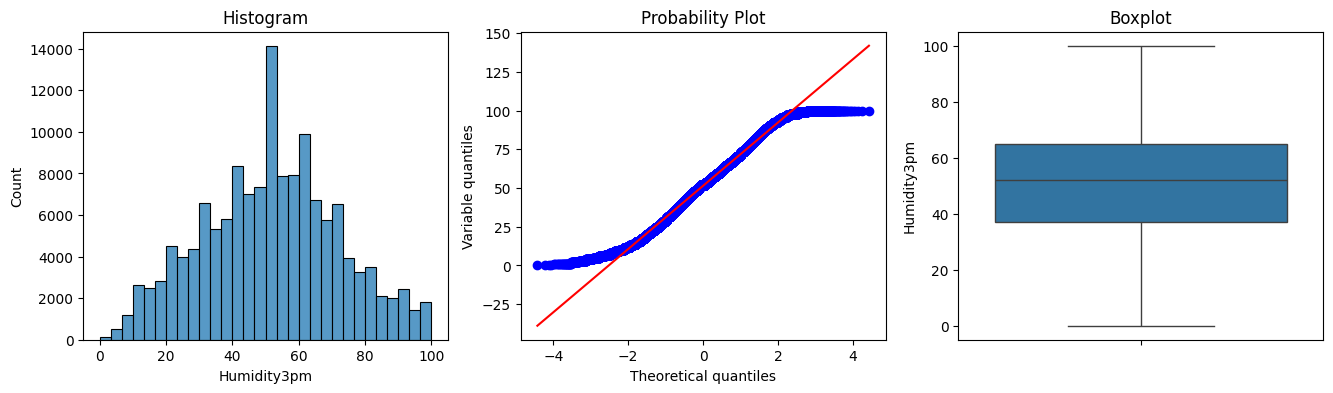

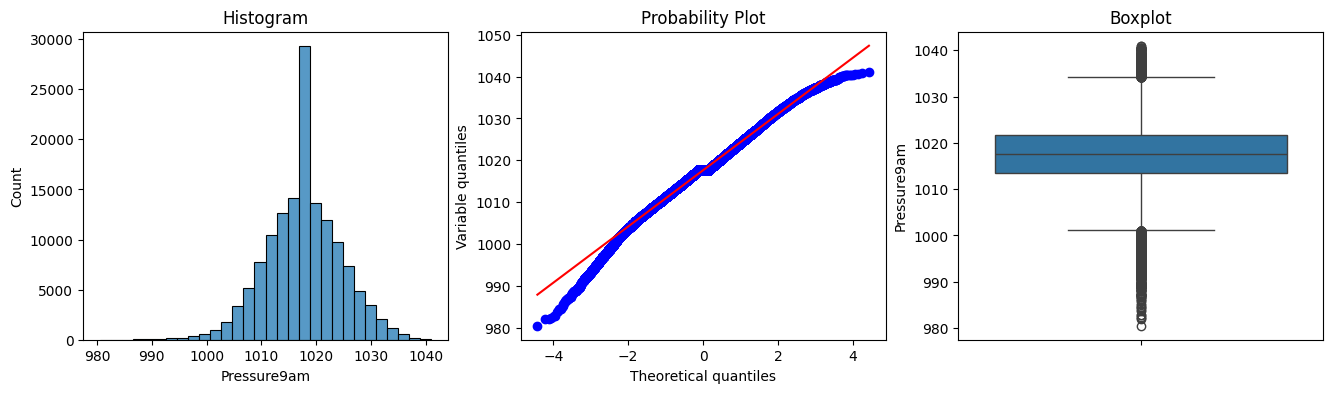

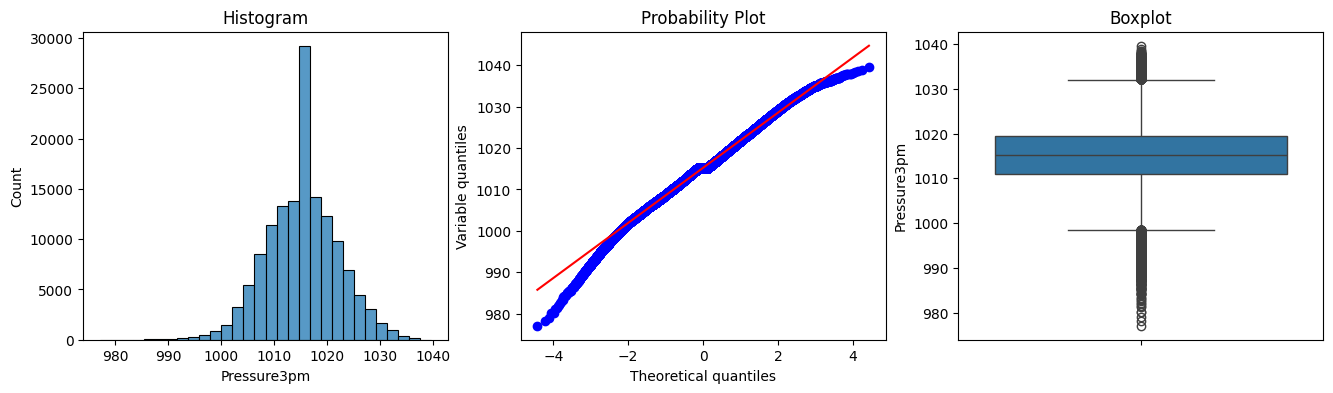

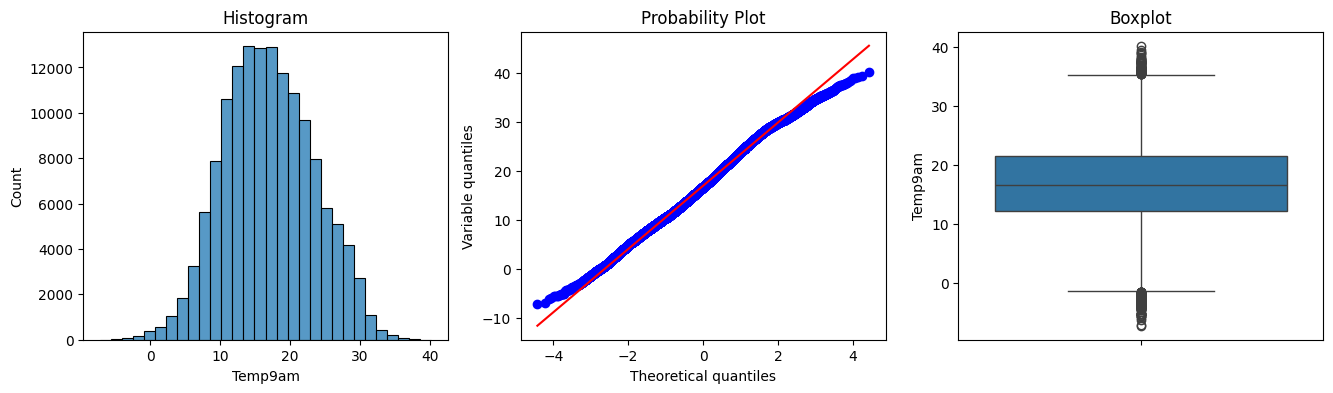

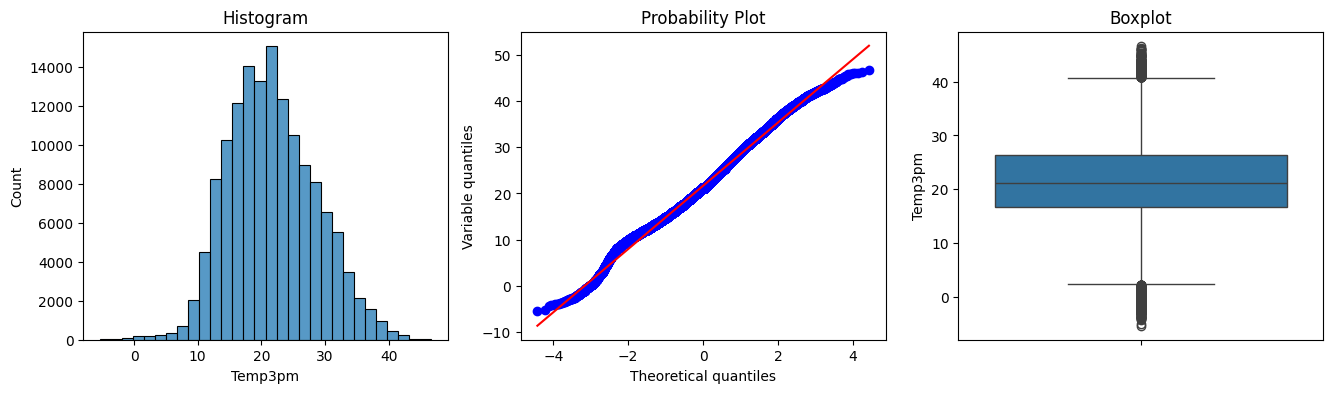

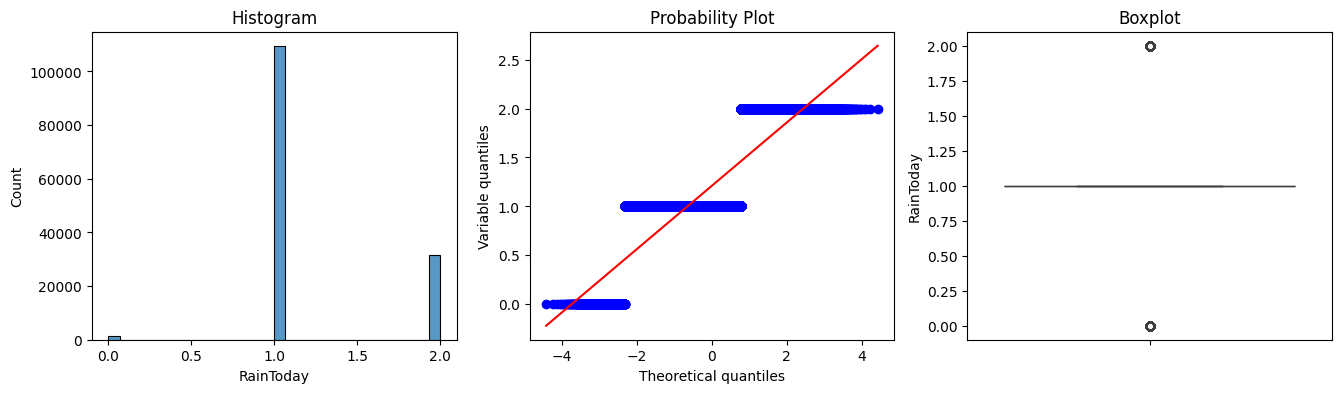

In [156]:
# let's find outliers
ds_columns = ds.drop(["RainTomorrow"], axis=1).columns

for x in ds_columns:
  diagnostic_plots(ds, x)


In [157]:
def find_skewed_boundaries(ds, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = ds[variable].quantile(0.75) - ds[variable].quantile(0.25)

    lower_boundary = ds[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = ds[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [159]:
#distance = 4
#ds_clean = remove_outliers(ds, ds_columns, distance)

In [160]:
#for x in ds_columns:
#  diagnostic_plots(ds, x)

In [161]:
Rainfall_upper_limit, Rainfall_lower_limit = find_skewed_boundaries(ds, 'Rainfall', 4)
Rainfall_upper_limit, Rainfall_lower_limit

(3.0, -2.4)

In [162]:
outliers_Rainfall = np.where(ds['Rainfall'] > Rainfall_upper_limit, True,
                       np.where(ds['Rainfall'] < Rainfall_lower_limit, True, False))

In [163]:
ds = ds.loc[~outliers_Rainfall, ]

ds.shape

(121063, 18)

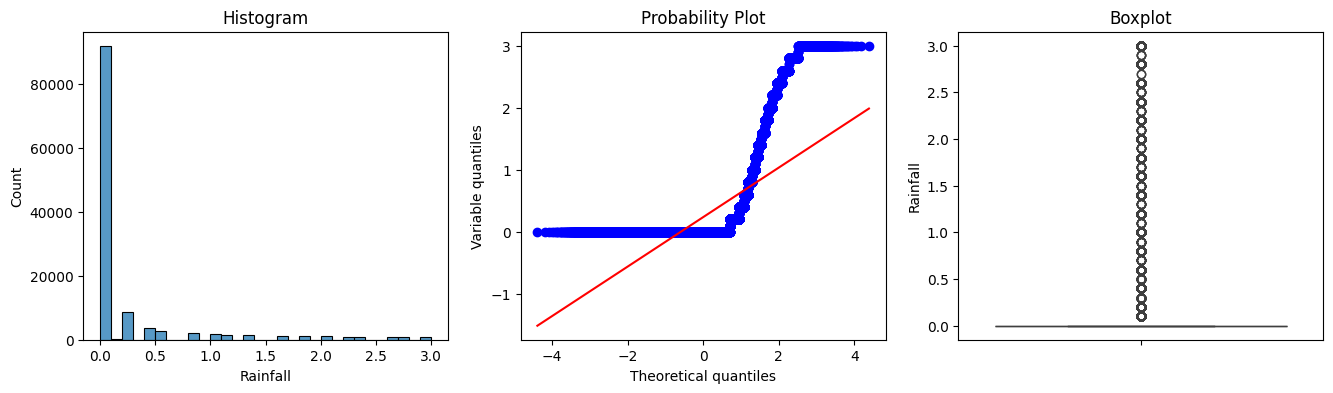

In [164]:
diagnostic_plots(ds, 'Rainfall')

In [165]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121063 entries, 0 to 145458
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       121063 non-null  int64  
 1   MinTemp        121063 non-null  float64
 2   MaxTemp        121063 non-null  float64
 3   Rainfall       121063 non-null  float64
 4   WindGustDir    121063 non-null  int64  
 5   WindGustSpeed  121063 non-null  float64
 6   WindDir9am     121063 non-null  int64  
 7   WindDir3pm     121063 non-null  int64  
 8   WindSpeed9am   121063 non-null  float64
 9   WindSpeed3pm   121063 non-null  float64
 10  Humidity9am    121063 non-null  float64
 11  Humidity3pm    121063 non-null  float64
 12  Pressure9am    121063 non-null  float64
 13  Pressure3pm    121063 non-null  float64
 14  Temp9am        121063 non-null  float64
 15  Temp3pm        121063 non-null  float64
 16  RainToday      121063 non-null  int64  
 17  RainTomorrow   121063 non-null  in

In [166]:
from sklearn.preprocessing import MinMaxScaler

# set up the scaler
cols_to_scale = ds.select_dtypes(include=['float64', 'int64']).columns
ds[cols_to_scale].describe()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000
mean,23.757440,11.993527,23.727584,0.234979,7.982042,39.105003,7.483029,8.236728,13.630102,18.382825,66.496807,48.724226,1018.184698,1015.596256,17.138877,22.172244,1.073672,0.172836
std,14.259195,6.442369,7.091808,0.583586,4.959352,12.680182,4.792653,4.885655,8.662468,8.562440,18.785358,19.778030,6.516094,6.530665,6.529955,6.844658,0.302445,0.378107
min,0.000000,-8.500000,-4.100000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,983.700000,977.100000,-5.600000,-4.400000,0.000000,0.000000
25%,11.000000,7.400000,18.500000,0.000000,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,55.000000,34.000000,1014.200000,1011.500000,12.400000,17.200000,1.000000,0.000000
50%,24.000000,11.900000,23.200000,0.000000,8.000000,39.000000,7.000000,9.000000,13.000000,19.000000,68.000000,50.000000,1017.600000,1015.200000,16.900000,21.500000,1.000000,0.000000
75%,36.000000,16.600000,28.700000,0.000000,12.000000,46.000000,11.000000,12.000000,19.000000,24.000000,80.000000,62.000000,1022.300000,1019.700000,21.700000,26.800000,1.000000,0.000000
max,48.000000,33.900000,48.100000,3.000000,16.000000,135.000000,16.000000,16.000000,130.000000,83.000000,100.000000,100.000000,1041.000000,1039.600000,40.200000,46.700000,2.000000,1.000000


In [167]:
scaler = MinMaxScaler()
ds[cols_to_scale] = scaler.fit_transform(ds[cols_to_scale])
ds[cols_to_scale].describe()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000,121063.000000
mean,0.494947,0.483338,0.533095,0.078326,0.498878,0.256628,0.467689,0.514795,0.104847,0.221480,0.664968,0.487242,0.601827,0.615940,0.496482,0.520005,0.536836,0.172836
std,0.297067,0.151943,0.135858,0.194529,0.309960,0.098296,0.299541,0.305353,0.066634,0.103162,0.187854,0.197780,0.113719,0.104491,0.142575,0.133946,0.151223,0.378107
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.229167,0.375000,0.432950,0.000000,0.250000,0.193798,0.187500,0.250000,0.053846,0.156627,0.550000,0.340000,0.532286,0.550400,0.393013,0.422701,0.500000,0.000000
50%,0.500000,0.481132,0.522989,0.000000,0.500000,0.255814,0.437500,0.562500,0.100000,0.228916,0.680000,0.500000,0.591623,0.609600,0.491266,0.506849,0.500000,0.000000
75%,0.750000,0.591981,0.628352,0.000000,0.750000,0.310078,0.687500,0.750000,0.146154,0.289157,0.800000,0.620000,0.673647,0.681600,0.596070,0.610568,0.500000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [168]:
ds.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.041667,0.516509,0.517241,0.200000,0.8750,0.294574,0.8750,0.9375,0.153846,0.289157,0.71,0.22,0.418848,0.4800,0.491266,0.512720,0.5,0.0
1,0.041667,0.375000,0.559387,0.000000,0.9375,0.294574,0.4375,1.0000,0.030769,0.265060,0.44,0.25,0.469459,0.4912,0.497817,0.561644,0.5,0.0
2,0.041667,0.504717,0.570881,0.000000,1.0000,0.310078,0.8750,1.0000,0.146154,0.313253,0.38,0.30,0.417103,0.5056,0.580786,0.540117,0.5,0.0
3,0.041667,0.417453,0.614943,0.000000,0.3125,0.139535,0.6250,0.0000,0.084615,0.108434,0.45,0.16,0.591623,0.5712,0.517467,0.604697,0.5,0.0
4,0.041667,0.613208,0.697318,0.333333,0.8750,0.271318,0.0625,0.5000,0.053846,0.240964,0.82,0.33,0.472949,0.4624,0.510917,0.667319,0.5,0.0


In [169]:
ds.to_csv('/content/drive/MyDrive/SS/weatherAUS_modf.csv', index=False)
ds

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.041667,0.516509,0.517241,0.200000,0.8750,0.294574,0.8750,0.9375,0.153846,0.289157,0.71,0.22,0.418848,0.4800,0.491266,0.512720,0.5,0.0
1,0.041667,0.375000,0.559387,0.000000,0.9375,0.294574,0.4375,1.0000,0.030769,0.265060,0.44,0.25,0.469459,0.4912,0.497817,0.561644,0.5,0.0
2,0.041667,0.504717,0.570881,0.000000,1.0000,0.310078,0.8750,1.0000,0.146154,0.313253,0.38,0.30,0.417103,0.5056,0.580786,0.540117,0.5,0.0
3,0.041667,0.417453,0.614943,0.000000,0.3125,0.139535,0.6250,0.0000,0.084615,0.108434,0.45,0.16,0.591623,0.5712,0.517467,0.604697,0.5,0.0
4,0.041667,0.613208,0.697318,0.333333,0.8750,0.271318,0.0625,0.5000,0.053846,0.240964,0.82,0.33,0.472949,0.4624,0.510917,0.667319,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,0.854167,0.283019,0.496169,0.000000,0.0000,0.193798,0.1250,0.0000,0.115385,0.156627,0.59,0.27,0.715532,0.7056,0.327511,0.495108,0.5,0.0
145455,0.854167,0.266509,0.526820,0.000000,0.0000,0.193798,0.6250,0.0625,0.100000,0.132530,0.51,0.24,0.713787,0.6912,0.342795,0.524462,0.5,0.0
145456,0.854167,0.285377,0.563218,0.000000,0.4375,0.124031,0.6250,0.2500,0.100000,0.108434,0.56,0.21,0.694590,0.6720,0.360262,0.565558,0.5,0.0
145457,0.854167,0.327830,0.593870,0.000000,0.2500,0.240310,0.6250,0.9375,0.069231,0.108434,0.53,0.24,0.650960,0.6352,0.395197,0.596869,0.5,0.0
